<div style="text-align: justify">
<font size=6><br>
<img src="UISlogo.png" align="left" width="297" height="200"/> 
<h4 align="center">Estadística II</h4></font> 
<font size=5><h4 align="center">Trabajo Muestreo - Inferencia</h4></font>  

<font size=4><br>
      

<font size=5><h4 align="left">Intregrantes: </h4></font>      
2172016 - Kevin Javier Lozano Galvis<br><br>
2170688 - Brayan Rodolfo Barajas Ochoa<br><br>
2160090 - Kevin Joel Dlaikan Castillo<br> 

<h3 align="center">Enunciado</h3><br> 
En los siguientes enlaces encontrará los datos relacionados con los resultados de las pruebas de estado para las Instituciones de Educación Superior (IES) colombianas de carácter universitario de los últimos tres (3) años: <br>

https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1

Considere estos datos como una población finita. Las variables que componen la tabla son:

- **periodo:** año de realización de la prueba. La variable se presenta fragmentada debido al origen de los datos. Requiere agruparse adecuadamente. Para ello, consulte la función `revalue` y describa, brevemente, su funcionamiento.
- **apli_consecutivo:** consecutivo asignado al estudiante en el momento de presentar la prueba. Único por estudiante. 
- **estu_depto_reside:** departamento de residencia del estudiante.
- **estu_cod_reside_depto:** código DANE del departamento de residencia del estudiante.
- **inst_cod_institucion:** código de la IES ante el ministerio. Único por Institución.
- **inst_nombre_institucion:** Nombre de la Institución. Algunas presentan sedes y subsedes.
- **raz_cuant_punt:** Puntaje Razonamiento Cuantitativo.
- **raz_cuant_des:** Nivel de Desempeño Razonamiento Cuantitativo (categórica).
- **lect_crit_punt:** Puntaje Lectura Crítica.
- **lect_crit_des:** Nivel de Desempeño Lectura Crítica (categórica).
- **comp_ciud_punt:** Puntaje Competencias Ciudadanas.
- **comp_ciud_des:** Nivel de Desempeño Competencias Ciudadanas (categórica).
- **ingles_punt:** Puntaje Inglés.
- **ingles_desem:** Nivel de Desempeño en Inglés (categórica).
- **comu_escr_punt:** Puntaje Comunicación Escrita.
- **comu_escr_des:** Nivel de Desempeño Comunicación Escrita (categórica).

Tenga en cuenta que algunas variables categóricas figuran como numéricas, haga la correspondiente transformación.

Los puntos a desarrollar son:

1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
2. Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
3. Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
4. ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
5. Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
6. Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

El trabajo puede entregarse en formato PDF o como notebook de jupyter

**Recomendaciones:**

- Procure tabular de manera adecuada las estimaciones para optimizar espacio
- Evite extenderse en las explicaciones
- Trate de optimizar el uso de gráficas (visite el siguiente repositorio si desea una guía: https://github.com/karlosmantilla/graficas-basicas-descriptivas-
- Referencie las fórmulas empleadas en los cálculos

<h3 align="center">Desarrollo</h3><br> 

In [1]:
load(url('https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1')) # Se carga la Data esde una url

In [2]:
ls()
dim(sp161718) #dimensiones Dataframe
names(sp161718) #Nombres Variables

[1] "sp161718"

[1] 725295     16

[1] "periodo"                 "apli_consecutivo"       
 [3] "estu_depto_reside"       "estu_cod_reside_depto"  
 [5] "inst_cod_institucion"    "inst_nombre_institucion"
 [7] "raz_cuant_punt"          "raz_cuant_des"          
 [9] "lect_crit_punt"          "lect_crit_des"          
[11] "comp_ciud_punt"          "comp_ciud_des"          
[13] "ingles_punt"             "ingles_desem"           
[15] "comu_escr_punt"          "comu_escr_des"

Es importante aclarar que las tres variables a analizar serán razonamiento cuantitativo, lectura crítica y competencias ciudadanas; cada una con su respectiva variable categórica. Además, se incluye el periodo y la variable a utilizar para conglomerados que será departamento

In [3]:
data<-data.frame(periodo=sp161718$periodo, departamento=sp161718$estu_depto_reside, raz_cuant_punt=sp161718$raz_cuant_punt, raz_cuant_des=sp161718$raz_cuant_des, lect_crit_punt=sp161718$lect_crit_punt, lect_crit_des=sp161718$lect_crit_des, comp_ciud_punt=sp161718$comp_ciud_punt, comp_ciud_des=sp161718$comp_ciud_des) #Nuevo Dataframe a usar

In [4]:
unique(data$periodo) #Se mira los tipos de periodo para utilizar revalue
unique(data$raz_cuant_des) #Se mira los tipos de variable categórica para hacer conversión

[1] 20163 20162 20173 20172 20183 20182 20184

[1] 3 2 1 4

Primeramente, se hace el ajuste a la columna de periodo, para que esta contenga únicamente el año correspondiente. <br>
La función revalue obtiene como parámetros una lista tipo factor y el vector de valores a reemplazar, en donde el índice es el valor a reemplazar y su dato correspondiente es el nuevo valor. 

In [5]:
library(plyr) #Librería necesaria para revalue

In [6]:
temp<-factor(data$periodo) #Para aplicar la función revalue, es necesario pasarle una variable tipo factor
#Se hace el ajuste para que periodo sea únicamente el año
data$periodo<-revalue(temp, c("20163"="2016", "20162"="2016", "20173"="2017", "20172"="2017","20183"="2018","20182"="2018","20184"="2018")) #Uso de revalue
#Se hace la conversion de variables categoricas
data$raz_cuant_des<-factor(data$raz_cuant_des, levels = c(1,2,3,4), labels = c("Deficiente","Aceptable","Bueno","Excelente"))
data$lect_crit_des<-factor(data$lect_crit_des, levels = c(1,2,3,4), labels = c("Deficiente","Aceptable","Bueno","Excelente")) 
data$comp_ciud_des<-factor(data$comp_ciud_des, levels = c(1,2,3,4), labels = c("Deficiente","Aceptable","Bueno","Excelente")) 
head(data) #Se verifica que se hayan hecho los cambios correctamente

,periodo,departamento,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
1,2016,ATLANTICO,160,Bueno,130,Aceptable,167,Bueno
2,2016,CUNDINAMARCA,138,Aceptable,132,Aceptable,77,Deficiente
3,2016,CALDAS,146,Aceptable,157,Aceptable,150,Aceptable
4,2016,MAGDALENA,160,Bueno,172,Bueno,151,Aceptable
5,2016,CORDOBA,130,Aceptable,122,Deficiente,144,Aceptable
6,2016,CAUCA,159,Bueno,129,Aceptable,147,Aceptable


In [72]:
#Función para obetener los principales datos estadísticos
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
    x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  skew <- sum((x-m)^3/s^3)/n
  kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("tamaño"=n, "media"=m, "desviación estándar"=s, "simetría"=skew, "kurtosis"=kurt))
}

In [8]:
#stats poblacion
stats.raz.cuant<-round(mystats(data[,'raz_cuant_punt']),1)
stats.lect.crit<-round(mystats(data[,'lect_crit_punt']),1)
stats.comp.ciud<-round(mystats(data[,'comp_ciud_punt']),1)
data.frame(stats.raz.cuant,stats.lect.crit,stats.comp.ciud)

,stats.raz.cuant,stats.lect.crit,stats.comp.ciud
,<dbl>,<dbl>,<dbl>
tamaño,725295.0,725295.0,725295.0
media,149.5,150.1,144.8
desviación estándar,30.7,31.0,32.5
simetría,0.2,0.0,-0.1
kurtosis,0.1,-0.3,0.0


In [10]:
library(samplingbook)
library(repr)
options(repr.plot.width=12, repr.plot.height=12)

<h3 align="left">Tamaño de Muestra</h3><br> 

Antes de hacer cualquier muestreo, es necesario conocer el tamaño de muestra adecuado para la población. Esto se hace a continuación, para esto se toma un nivel de confianza de $95\%$ y la proporción predeterminada de $0.5$.

In [11]:
tmuestra<-sample.size.prop(e=0.05, P = 0.5, N = nrow(data), level = 0.95)
print(tmuestra)


sample.size.prop object: Sample size for proportion estimate
With finite population correction: N=725295, precision e=0.05 and expected proportion P=0.5

Sample size needed: 384



A continuación, se procede a realizar cada uno de los muestreos con sus respectivas inferencias para cada variable. <br>
El análisis se realizará al final, de tal forma que se puedan comparar todos los muestreos realizados.

<h3 align="left">Muestreo Aleatorio Simple</h3><br> 

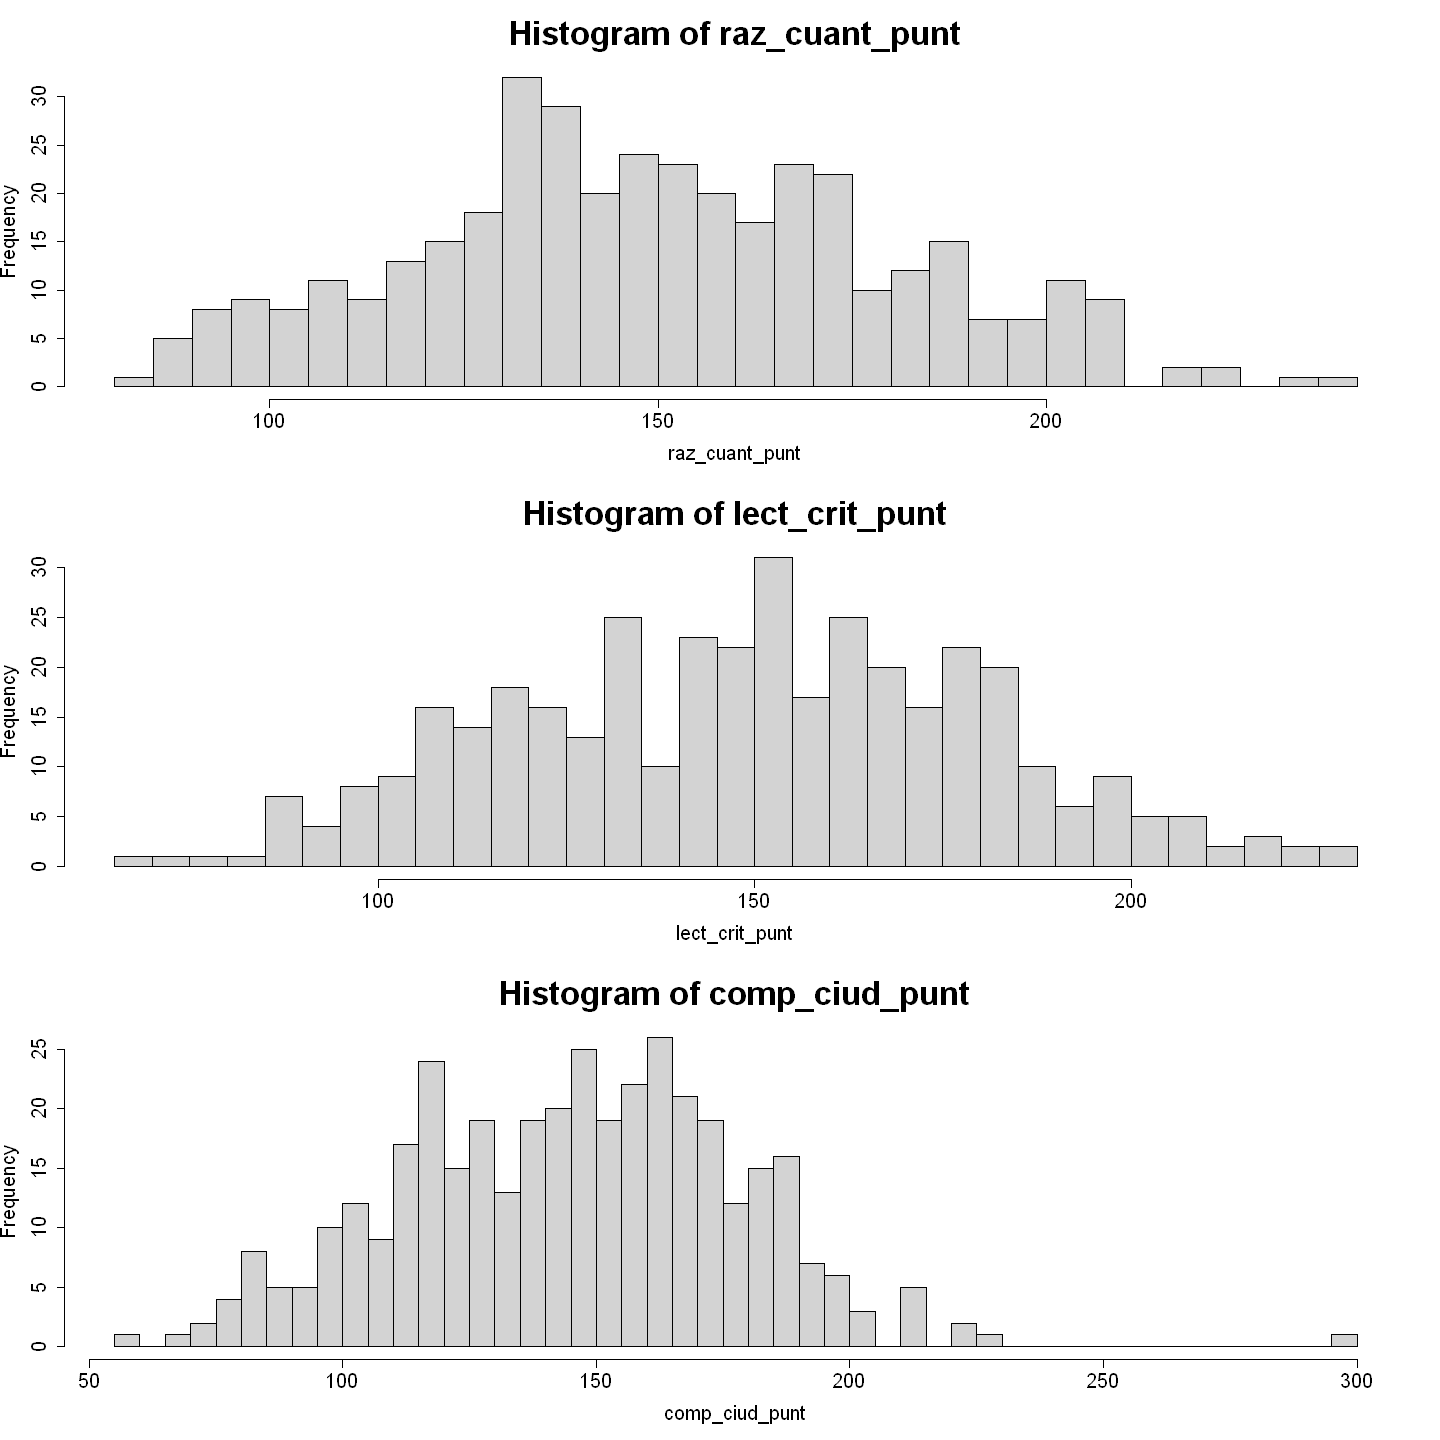

In [12]:
mas<- sample(1:nrow(data),size=384,replace=FALSE) #Se realiza el MAS
d.mas<-data[mas,]
par(mfrow=c(3,1))
with(d.mas, hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.mas, hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.mas, hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
par(mfrow=c(1,1))

In [13]:
#stats MAS
stats.mas.raz.cuant<-round(mystats(data[mas,'raz_cuant_punt']),1)
stats.mas.lect.crit<-round(mystats(data[mas,'lect_crit_punt']),1)
stats.mas.comp.ciud<-round(mystats(data[mas,'comp_ciud_punt']),1)
data.frame(stats.mas.raz.cuant,stats.mas.lect.crit,stats.mas.comp.ciud)

,stats.mas.raz.cuant,stats.mas.lect.crit,stats.mas.comp.ciud
,<dbl>,<dbl>,<dbl>
tamaño,384.0,384.0,384.0
media,150.1,149.4,145.4
desviación estándar,30.6,31.3,33.1
simetría,0.2,0.0,0.1
kurtosis,-0.4,-0.5,0.5


In [14]:
inf_manual <- function(data, n_conf){
    media <- mean(na.omit(data)) # Pedimos la media
    desv <- sd(na.omit(data)) # La desviación estándar
    N <- length(na.omit(data)) # El tamaño válido de la muestra
    error.est <- desv/sqrt(N) # Calculamos el error estándar
    error <- n_conf*error.est # Fijamos Z=2 para indicar un nivel de confianza de 95%
    lim.inf <- media-error # Límite inferior del intervalo
    lim.sup <- media+error # Límite superior del intervalo
    inferencia<- data.frame(media, desv, N, error.est, error, lim.inf, lim.sup)
  return(inferencia)
}

In [15]:
infmas_raz_cuant90<- inf_manual(d.mas$raz_cuant_punt,1.64)
round(infmas_raz_cuant90,2)

infmas_lect_crit90<- inf_manual(d.mas$lect_crit_punt,1.64)
round(infmas_lect_crit90,2)

infmas_comp_ciud90<- inf_manual(d.mas$comp_ciud_punt,1.64)
round(infmas_comp_ciud90,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150.1,30.56,384,1.56,2.56,147.55,152.66


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
149.41,31.34,384,1.6,2.62,146.79,152.03


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
145.38,33.11,384,1.69,2.77,142.61,148.15


In [16]:
infmas_raz_cuant95<- inf_manual(d.mas$raz_cuant_punt,1.96)
round(infmas_raz_cuant95,2)

infmas_lect_crit95<- inf_manual(d.mas$lect_crit_punt,1.96)
round(infmas_lect_crit95,2)

infmas_comp_ciud95<- inf_manual(d.mas$comp_ciud_punt,1.96)
round(infmas_comp_ciud95,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150.1,30.56,384,1.56,3.06,147.05,153.16


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
149.41,31.34,384,1.6,3.13,146.27,152.54


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
145.38,33.11,384,1.69,3.31,142.07,148.69


In [17]:
infmas_raz_cuant99<- inf_manual(d.mas$raz_cuant_punt,2.57)
round(infmas_raz_cuant99,2)

infmas_lect_crit99<- inf_manual(d.mas$lect_crit_punt,2.57)
round(infmas_lect_crit99,2)

infmas_comp_ciud99<- inf_manual(d.mas$comp_ciud_punt,2.57)
round(infmas_comp_ciud99,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150.1,30.56,384,1.56,4.01,146.1,154.11


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
149.41,31.34,384,1.6,4.11,145.3,153.52


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
145.38,33.11,384,1.69,4.34,141.03,149.72


<h3 align="left">Muestreo Estratificado</h3><br> 

In [19]:
library(magrittr) # Permite leer la función %>%
library(dplyr) # Contiene la función select
library(SamplingUtil) # Contiene la funcion nstrata que nos permite calcular los estratos

In [20]:
praz<-data.frame(praz=data$raz_cuant_punt)
draz<- data.frame(draz=data$raz_cuant_des)
dataraz<- data.frame(praz,draz)

plect<-data.frame(plect=data$lect_crit_punt)
dlect<- data.frame(dlect=data$lect_crit_des)
datalect<- data.frame(plect,dlect)

pcomp<-data.frame(pcomp=data$comp_ciud_punt)
dcomp<- data.frame(dcomp=data$comp_ciud_des)
datacomp<- data.frame(pcomp,dcomp)

In [23]:
EstratosRaz <- dataraz %>%
  select(draz, praz) %>%
  group_by(draz) %>%
  summarise(n=n(), 
            s=sd(praz)) %>%
  mutate(p=n/sum(n))

EstratosRaz

EstratosLect <- datalect %>%
  select(dlect, plect) %>%
  group_by(dlect) %>%
  summarise(n=n(), 
            s=sd(plect)) %>%
  mutate(p=n/sum(n))

EstratosLect

EstratosComp <- datacomp %>%
  select(dcomp, pcomp) %>%
  group_by(dcomp) %>%
  summarise(n=n(), 
            s=sd(pcomp)) %>%
  mutate(p=n/sum(n))

EstratosComp

draz,n,s,p
<fct>,<int>,<dbl>,<dbl>
Deficiente,168183,12.148419,0.23188220
Aceptable,234534,7.978031,0.32336360
Bueno,292264,13.121279,0.40295880
Excelente,30314,15.831535,0.04179541


dlect,n,s,p
<fct>,<int>,<dbl>,<dbl>
Deficiente,157557,12.949062,0.21723161
Aceptable,270686,9.385729,0.37320814
Bueno,255418,11.562116,0.35215740
Excelente,41634,10.098844,0.05740285


dcomp,n,s,p
<fct>,<int>,<dbl>,<dbl>
Deficiente,202064,15.354723,0.27859561
Aceptable,248924,9.157064,0.34320380
Bueno,246438,11.539646,0.33977623
Excelente,27869,13.287947,0.03842437


In [24]:
nsizeProp384raz<-nstrata(n=384,wh=EstratosRaz[,4],method="proportional")
nsizeProp384lect<-nstrata(n=384,wh=EstratosLect[,4],method="proportional")
nsizeProp384comp<-nstrata(n=384,wh=EstratosComp[,4],method="proportional")

In [25]:
data.frame(des=EstratosRaz$draz,nsizeProp384raz)
data.frame(des=EstratosLect$dlect,nsizeProp384lect)
data.frame(des=EstratosComp$dcomp,nsizeProp384comp)

des,p
<fct>,<dbl>
Deficiente,90
Aceptable,125
Bueno,155
Excelente,17


des,p
<fct>,<dbl>
Deficiente,84
Aceptable,144
Bueno,136
Excelente,23


des,p
<fct>,<dbl>
Deficiente,107
Aceptable,132
Bueno,131
Excelente,15


In [26]:
muestradeficienteRaz<- sample(1:nrow(data[data$raz_cuant_des=='Deficiente',]),size=90,replace=FALSE)
muestraaceptableRaz<- sample(1:nrow(data[data$raz_cuant_des=='Aceptable',]),size=125,replace=FALSE)
muestrabuenoRaz<- sample(1:nrow(data[data$raz_cuant_des=='Bueno',]),size=155,replace=FALSE)
muestraexcelenteRaz<- sample(1:nrow(data[data$raz_cuant_des=='Excelente',]),size=17,replace=FALSE)

mestratoraz<-c(muestradeficienteRaz,muestraaceptableRaz,muestrabuenoRaz,muestraexcelenteRaz)

In [27]:
muestradeficienteLect<- sample(1:nrow(data[data$lect_crit_des=='Deficiente',]),size=84,replace=FALSE)
muestraaceptableLect<- sample(1:nrow(data[data$lect_crit_des=='Aceptable',]),size=144,replace=FALSE)
muestrabuenoLect<- sample(1:nrow(data[data$lect_crit_des=='Bueno',]),size=136,replace=FALSE)
muestraexcelenteLect<- sample(1:nrow(data[data$lect_crit_des=='Excelente',]),size=23,replace=FALSE)

mestratolect<-c(muestradeficienteLect,muestraaceptableLect,muestrabuenoLect,muestraexcelenteLect)

In [28]:
muestradeficienteComp<- sample(1:nrow(data[data$comp_ciud_des=='Deficiente',]),size=107,replace=FALSE)
muestraaceptableComp<- sample(1:nrow(data[data$comp_ciud_des=='Aceptable',]),size=132,replace=FALSE)
muestrabuenoComp<- sample(1:nrow(data[data$comp_ciud_des=='Bueno',]),size=131,replace=FALSE)
muestraexcelenteComp<- sample(1:nrow(data[data$comp_ciud_des=='Excelente',]),size=15,replace=FALSE)

mestratocomp<-c(muestradeficienteComp,muestraaceptableComp,muestrabuenoComp,muestraexcelenteComp)

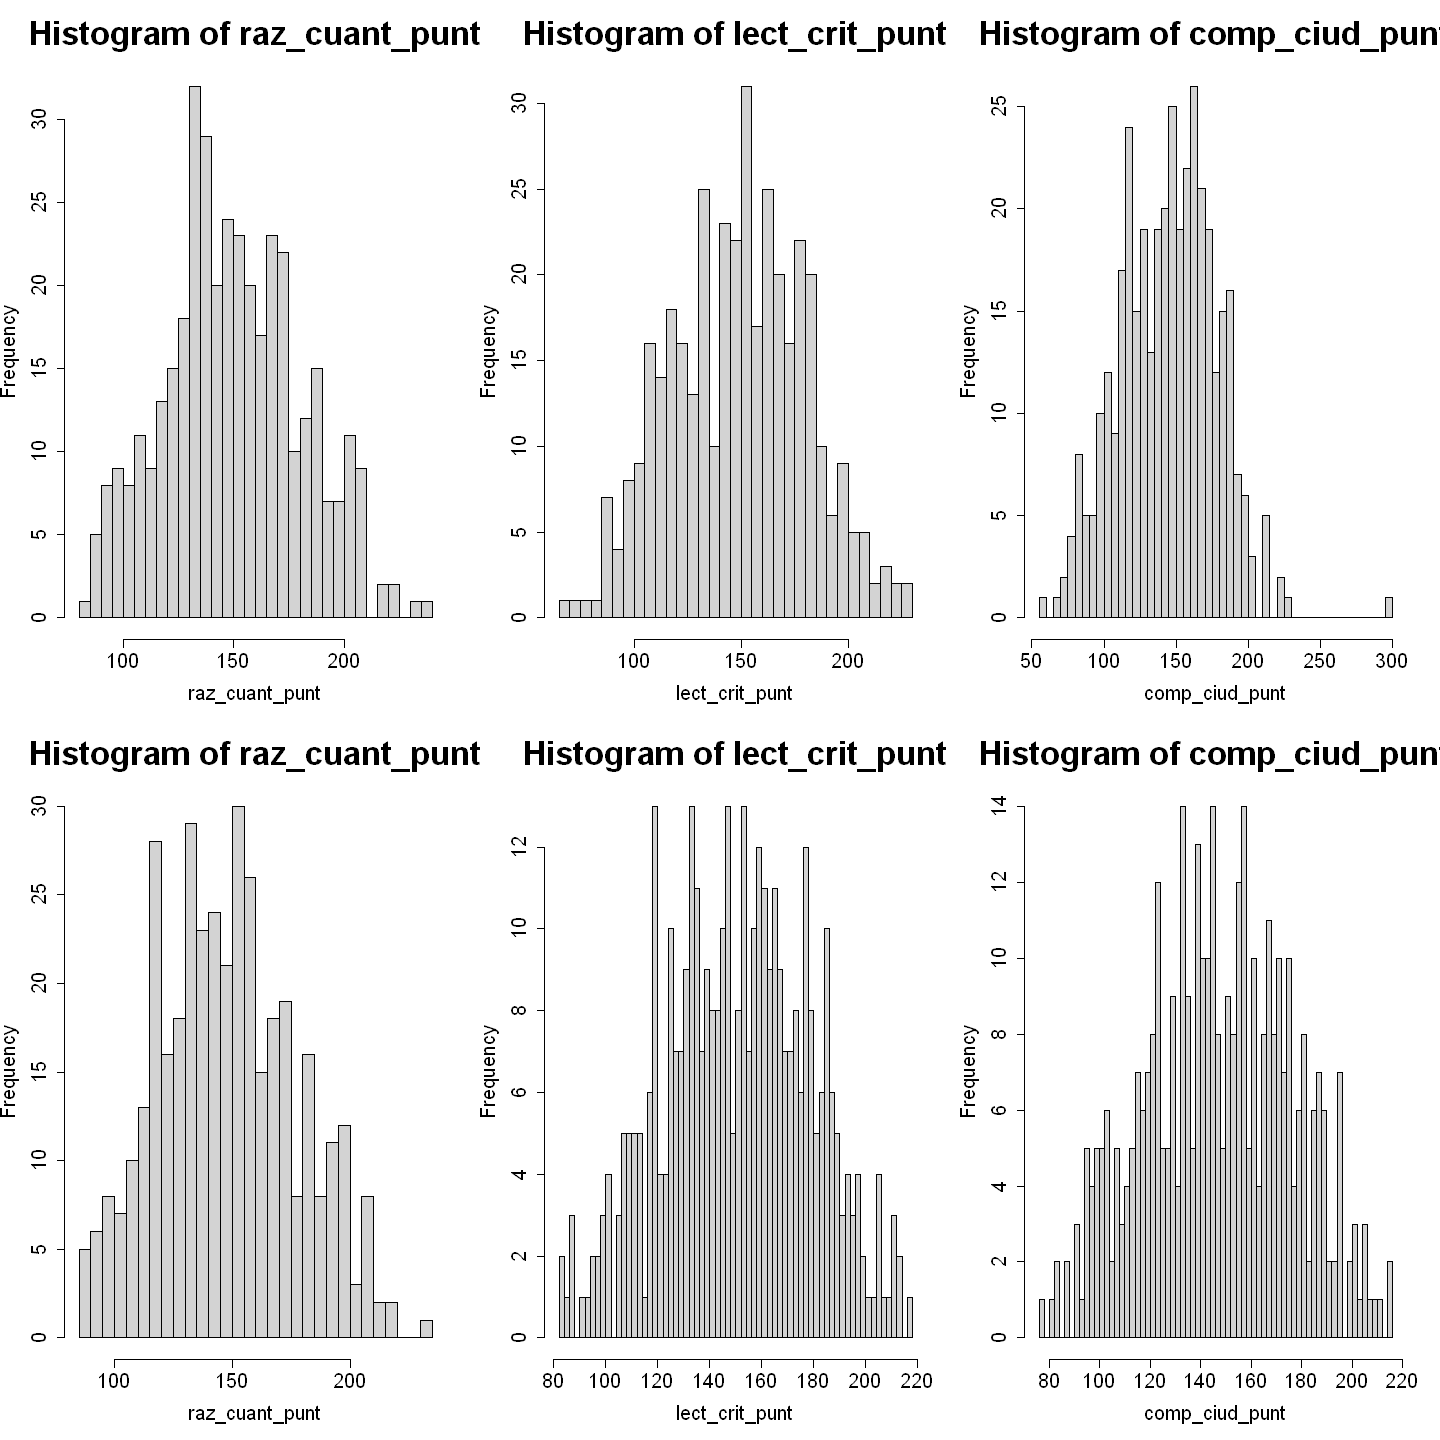

In [40]:
par(mfrow=c(2,3))
with(d.mas, hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.mas, hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.mas, hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))

with(data[mestratoraz,], hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(data[mestratolect,], hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(data[mestratocomp,], hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
par(mfrow=c(1,1))

Inferencia ME

In [30]:
stats.mmeraz.raz.cuant<-round(mystats(data[mestratoraz,'raz_cuant_punt']),1)
stats.mmelect.lect.crit<-round(mystats(data[mestratolect,'lect_crit_punt']),1)
stats.mmecomp.comp.ciud<-round(mystats(data[mestratocomp,'comp_ciud_punt']),1)
data.frame(stats.mmeraz.raz.cuant,stats.mmelect.lect.crit,stats.mmecomp.comp.ciud)

,stats.mmeraz.raz.cuant,stats.mmelect.lect.crit,stats.mmecomp.comp.ciud
,<dbl>,<dbl>,<dbl>
tamaño,387.0,387.0,385.0
media,148.2,151.1,147.4
desviación estándar,29.4,28.3,29.2
simetría,0.2,-0.1,0.0
kurtosis,-0.5,-0.6,-0.6


In [31]:
d.mmeraz<-data[mestratoraz,]
d.mmelect<-data[mestratolect,]
d.mmecomp<-data[mestratocomp,]

In [85]:
infme_raz_cuant90<- inf_manual(d.mmeraz$raz_cuant_punt,1.64)
round(infme_raz_cuant90,2)

infme_lect_crit90<-inf_manual(d.mmelect$lect_crit_punt,1.64)
round(infme_lect_crit90,2)

infme_comp_ciud90<-inf_manual(d.mmecomp$comp_ciud_punt,1.64)
round(infme_comp_ciud90,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148.22,29.44,387,1.5,2.45,145.77,150.67


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.1,28.33,387,1.44,2.36,148.74,153.46


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
147.38,29.17,385,1.49,2.44,144.94,149.82


In [86]:
infme_raz_cuant95<- inf_manual(d.mmeraz$raz_cuant_punt,1.96)
round(infme_raz_cuant95,2)

infme_lect_crit95<-inf_manual(d.mmelect$lect_crit_punt,1.96)
round(infme_lect_crit95,2)

infme_comp_ciud95<- inf_manual(d.mmecomp$comp_ciud_punt,1.96)
round(infme_comp_ciud95,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148.22,29.44,387,1.5,2.93,145.29,151.15


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.1,28.33,387,1.44,2.82,148.28,153.92


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
147.38,29.17,385,1.49,2.91,144.47,150.29


In [87]:
infme_raz_cuant99<-inf_manual(d.mmeraz$raz_cuant_punt,2.57)
round(infme_raz_cuant99,2)

infme_lect_crit99<- inf_manual(d.mmelect$lect_crit_punt,2.57)
round(infme_lect_crit99,2)

infme_comp_ciud99<- inf_manual(d.mmecomp$comp_ciud_punt,2.57)
round(infme_comp_ciud99,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
148.22,29.44,387,1.5,3.85,144.37,152.07


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.1,28.33,387,1.44,3.7,147.4,154.8


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
147.38,29.17,385,1.49,3.82,143.56,151.2


<h3 align="left">Muestreo por Conglomerados</h3><br> 

In [58]:
unique(data$departamento)

temp<-factor(data$departamento)
data$departamento<-revalue(temp, c("NARIÃ‘O"="NARINO", "NARIÃƒâ\200\230O"="NARINO"))

unique(data$departamento)

[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARINO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

The following `from` values were not present in `x`: NARIÃ‘O, NARIÃƒâ€˜O



[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARINO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

In [59]:
ddeptos <- data.frame(ddeptos=data$departamento)

praz<-data.frame(praz=data$raz_cuant_punt)
dataraz<- data.frame(praz,ddeptos)

plect<-data.frame(plect=data$lect_crit_punt)
datalect<- data.frame(plect,ddeptos)

pcomp<-data.frame(pcomp=data$comp_ciud_punt)
datacomp<- data.frame(pcomp,ddeptos)

In [68]:
Conglomerados <- dataraz %>%
  select(ddeptos, praz) %>%
  group_by(ddeptos) %>%
  summarise(n=n(), 
            s=sd(praz)) %>%
  mutate(p=n/sum(n))

Conglomerados

ddeptos,n,s,p
<fct>,<int>,<dbl>,<dbl>
,1997,30.86974,0.0027533624
AMAZONAS,195,29.87807,0.0002688561
ANTIOQUIA,86465,32.25236,0.1192135614
ARAUCA,1863,26.66001,0.0025686100
ATLANTICO,41127,30.34594,0.0567038240
BOGOTA,210798,30.12218,0.2906376026
BOLIVAR,22906,30.65915,0.0315816323
BOYACA,17955,28.47879,0.0247554443
CALDAS,14227,30.31349,0.0196154668


In [69]:
nsProp384<-nstrata(n=384,wh=Conglomerados[,4],method="proportional")

In [70]:
data.frame(des=Conglomerados$ddeptos,nsProp384)

des,p
<fct>,<dbl>
,2
AMAZONAS,1
ANTIOQUIA,46
ARAUCA,1
ATLANTICO,22
BOGOTA,112
BOLIVAR,13
BOYACA,10
CALDAS,8


In [79]:
neAMAZONAS<-1 # Cantidad de sujetos en AMAZONAS
meAMAZONAS_384<- sample(1:nrow(data[data$departamento=='AMAZONAS',]),size=neAMAZONAS,replace=FALSE)

neANTIOQUIA<-46 # Cantidad de sujetos en ANTIOQUIA
meANTIOQUIA_384<- sample(1:nrow(data[data$departamento=='ANTIOQUIA',]),size=neANTIOQUIA,replace=FALSE)

neARAUCA<-1 # Cantidad de sujetos en ARAUCA
meARAUCA_384<- sample(1:nrow(data[data$departamento=='ARAUCA',]),size=neARAUCA,replace=FALSE)

neATLANTICO<-22 # Cantidad de sujetos en ATLANTICO
meATLANTICO_384<- sample(1:nrow(data[data$departamento=='ATLANTICO',]),size=neATLANTICO,replace=FALSE)

neBOGOTA<-112 # Cantidad de sujetos en BOGOTA
meBOGOTA_384<- sample(1:nrow(data[data$departamento=='BOGOTA',]),size=neBOGOTA,replace=FALSE)

neBOLIVAR<-13 # Cantidad de sujetos en BOLIVAR
meBOLIVAR_384<- sample(1:nrow(data[data$departamento=='BOLIVAR',]),size=neBOLIVAR,replace=FALSE)

neBOYACA<-10 # Cantidad de sujetos en BOYACA
meBOYACA_384<- sample(1:nrow(data[data$departamento=='BOYACA',]),size=neBOYACA,replace=FALSE)

neCALDAS<-8 # Cantidad de sujetos en CALDAS
meCALDAS_384<- sample(1:nrow(data[data$departamento=='CALDAS',]),size=neCALDAS,replace=FALSE)

neCAQUETA<-3 # Cantidad de sujetos en CAQUETA
meCAQUETA_384<- sample(1:nrow(data[data$departamento=='CAQUETA',]),size=neCAQUETA,replace=FALSE)

neCASANARE<-2 # Cantidad de sujetos en CASANARE
meCASANARE_384<- sample(1:nrow(data[data$departamento=='CASANARE',]),size=neCASANARE,replace=FALSE)

neCAUCA<-9 # Cantidad de sujetos en CAUCA
meCAUCA_384<- sample(1:nrow(data[data$departamento=='CAUCA',]),size=neCAUCA,replace=FALSE)

neCESAR<-6 # Cantidad de sujetos en CESAR
meCESAR_384<- sample(1:nrow(data[data$departamento=='CESAR',]),size=neCESAR,replace=FALSE)

neCHOCO<-3 # Cantidad de sujetos en CHOCO
meCHOCO_384<- sample(1:nrow(data[data$departamento=='CHOCO',]),size=neCHOCO,replace=FALSE)

neCORDOBA<-10 # Cantidad de sujetos en CORDOBA
meCORDOBA_384<- sample(1:nrow(data[data$departamento=='CORDOBA',]),size=neCORDOBA,replace=FALSE)

neCUNDINAMARCA<-21 # Cantidad de sujetos en CUNDINAMARCA
meCUNDINAMARCA_384<- sample(1:nrow(data[data$departamento=='CUNDINAMARCA',]),size=neCUNDINAMARCA,replace=FALSE)

neEXTRANJERO<-1 # Cantidad de sujetos en EXTRANJERO
meEXTRANJERO_384<- sample(1:nrow(data[data$departamento=='EXTRANJERO',]),size=neEXTRANJERO,replace=FALSE)

neGUAINIA<-1 # Cantidad de sujetos en GUAINIA
meGUAINIA_384<- sample(1:nrow(data[data$departamento=='GUAINIA',]),size=neGUAINIA,replace=FALSE)

neGUAVIARE<-1 # Cantidad de sujetos en GUAVIARE
meGUAVIARE_384<- sample(1:nrow(data[data$departamento=='GUAVIARE',]),size=neGUAVIARE,replace=FALSE)

neHUILA<-8 # Cantidad de sujetos en HUILA
meHUILA_384<- sample(1:nrow(data[data$departamento=='HUILA',]),size=neHUILA,replace=FALSE)

neGUAJIRA<-4 # Cantidad de sujetos en GUAJIRA
meGUAJIRA_384<- sample(1:nrow(data[data$departamento=='LA GUAJIRA',]),size=neGUAJIRA,replace=FALSE)

neMAGDALENA<-6 # Cantidad de sujetos en MAGDALENA
meMAGDALENA_384<- sample(1:nrow(data[data$departamento=='MAGDALENA',]),size=neMAGDALENA,replace=FALSE)

neMETA<-8 # Cantidad de sujetos en META
meMETA_384<- sample(1:nrow(data[data$departamento=='META',]),size=neMETA,replace=FALSE)

neNARINO<-9 # Cantidad de sujetos en NARINO
meNARINO_384<- sample(1:nrow(data[data$departamento=='NARINO',]),size=neNARINO,replace=FALSE)

neNORTE_SANTANDER<-12 # Cantidad de sujetos en NORTE_SANTANDER
meNORTE_SANTANDER_384<- sample(1:nrow(data[data$departamento=='NORTE SANTANDER',]),size=neNORTE_SANTANDER,replace=FALSE)

nePUTUMAYO<-2 # Cantidad de sujetos en PUTUMAYO
mePUTUMAYO_384<- sample(1:nrow(data[data$departamento=='PUTUMAYO',]),size=nePUTUMAYO,replace=FALSE)

neQUINDIO<-5 # Cantidad de sujetos en QUINDIO
meQUINDIO_384<- sample(1:nrow(data[data$departamento=='QUINDIO',]),size=neQUINDIO,replace=FALSE)

neRISARALDA<-9 # Cantidad de sujetos en RISARALDA
meRISARALDA_384<- sample(1:nrow(data[data$departamento=='RISARALDA',]),size=neRISARALDA,replace=FALSE)

neSAN_ANDRES<-1 # Cantidad de sujetos en SAN_ANDRES
meSAN_ANDRES_384<- sample(1:nrow(data[data$departamento=='SAN ANDRES',]),size=neSAN_ANDRES,replace=FALSE)

neSANTANDER<-20 # Cantidad de sujetos en SANTANDER
meSANTANDER_384<- sample(1:nrow(data[data$departamento=='SANTANDER',]),size=neSANTANDER,replace=FALSE)

neSUCRE<-6 # Cantidad de sujetos en SUCRE
meSUCRE_384<- sample(1:nrow(data[data$departamento=='SUCRE',]),size=neSUCRE,replace=FALSE)

neTOLIMA<-10 # Cantidad de sujetos en TOLIMA
meTOLIMA_384<- sample(1:nrow(data[data$departamento=='TOLIMA',]),size=neTOLIMA,replace=FALSE)

neVALLE<-30 # Cantidad de sujetos en VALLE
meVALLE_384<- sample(1:nrow(data[data$departamento=='VALLE',]),size=neVALLE,replace=FALSE)

neVAUPES<-1 # Cantidad de sujetos en VAUPES
meVAUPES_384<- sample(1:nrow(data[data$departamento=='VAUPES',]),size=neVAUPES,replace=FALSE)

neVICHADA<-1 # Cantidad de sujetos en VICHADA
meVICHADA_384<- sample(1:nrow(data[data$departamento=='VICHADA',]),size=neVICHADA,replace=FALSE)

estrato384<-c( meAMAZONAS_384,meANTIOQUIA_384,meARAUCA_384,meATLANTICO_384,meBOGOTA_384,meBOLIVAR_384,meBOYACA_384,meCALDAS_384,meCAQUETA_384,meCASANARE_384,meCAUCA_384,meCESAR_384,meCHOCO_384,meCORDOBA_384,meCUNDINAMARCA_384,meEXTRANJERO_384,meGUAINIA_384,meGUAVIARE_384,meHUILA_384,meGUAJIRA_384,meMAGDALENA_384,meMETA_384,meNARINO_384,meNORTE_SANTANDER_384,mePUTUMAYO_384,meQUINDIO_384,meRISARALDA_384,meSAN_ANDRES_384,meSANTANDER_384,meSUCRE_384,meTOLIMA_384,meVALLE_384,meVAUPES_384,meVICHADA_384) # Unimos los tres vectores                                                                       

mc384<- data[estrato384,]
head(mc384)

,periodo,departamento,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>
106,2016,BOYACA,145,Aceptable,142,Aceptable,165,Bueno
82552,2016,CUNDINAMARCA,107,Deficiente,116,Deficiente,95,Deficiente
38256,2016,BOGOTA,133,Aceptable,177,Bueno,179,Bueno
2780,2016,BOYACA,141,Aceptable,147,Aceptable,153,Aceptable
48117,2016,CORDOBA,124,Deficiente,86,Deficiente,91,Deficiente
7232,2016,RISARALDA,182,Bueno,167,Bueno,202,Excelente


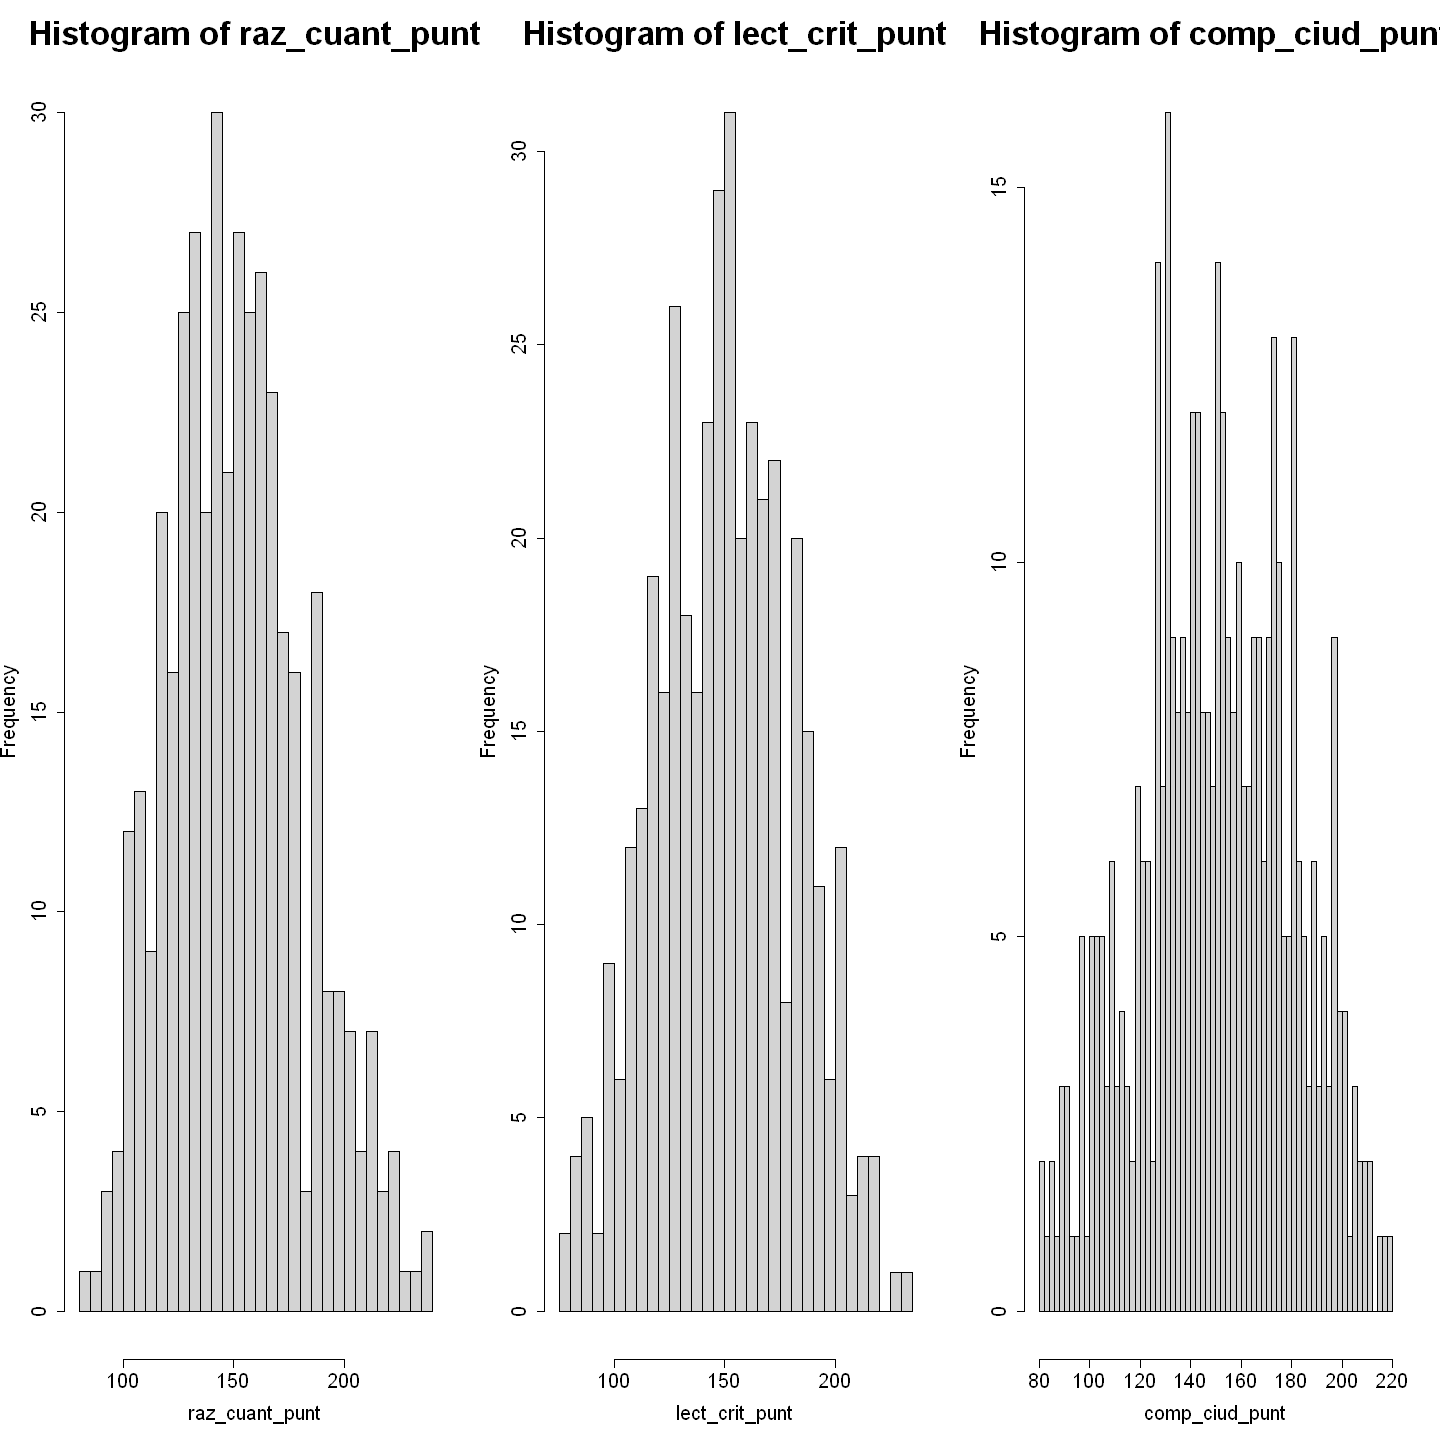

In [81]:
par(mfrow=c(1,3))

with(mc384, hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(mc384, hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(mc384, hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
par(mfrow=c(1,1))

<h3 align="left">Muestreo Sistemático</h3><br> 

El muestreo sistemático sí puede ser procedente debido a que no se observa alguna periodicidad en los datos a analizar, por lo que este probablemente sea lo suficientemente representativo

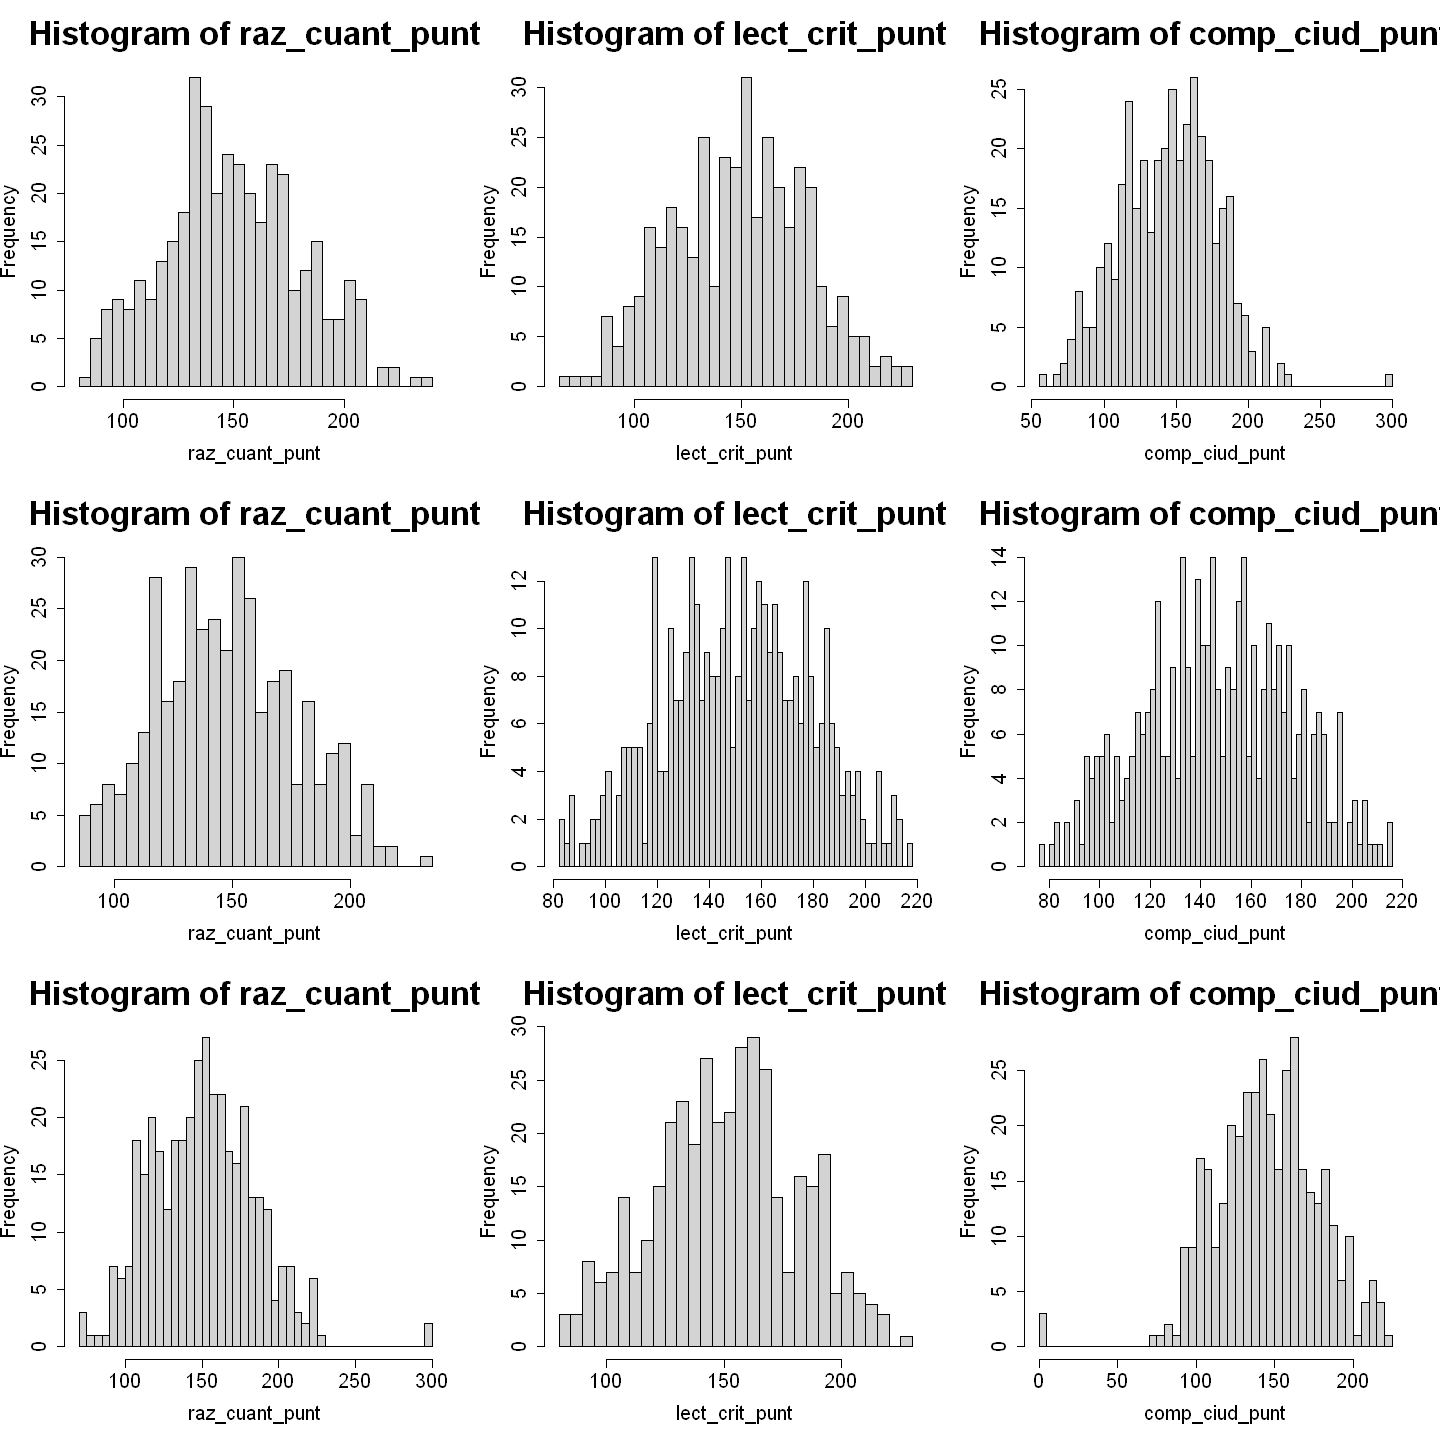

In [37]:
msis<- sys.sample(N=nrow(data),n=384)
d.msis<-data[msis,]
par(mfrow=c(3,3))
with(d.mas, hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.mas, hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.mas, hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))

with(data[mestratoraz,], hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(data[mestratolect,], hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(data[mestratocomp,], hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))

with(d.msis, hist(raz_cuant_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.msis, hist(lect_crit_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))
with(d.msis, hist(comp_ciud_punt, nclass = 50, cex.main=2.5, cex.axis=1.5, cex.lab=1.5))

par(mfrow=c(1,1))

In [41]:
#stats MAS
stats.msis.raz.cuant<-round(mystats(data[msis,'raz_cuant_punt']),1)
stats.msis.lect.crit<-round(mystats(data[msis,'lect_crit_punt']),1)
stats.msis.comp.ciud<-round(mystats(data[msis,'comp_ciud_punt']),1)
data.frame(stats.msis.raz.cuant,stats.msis.lect.crit,stats.msis.comp.ciud)

,stats.msis.raz.cuant,stats.msis.lect.crit,stats.msis.comp.ciud
,<dbl>,<dbl>,<dbl>
tamaño,384.0,384.0,384.0
media,151.5,151.4,146.0
desviación estándar,33.6,30.0,33.4
simetría,0.5,0.0,-0.5
kurtosis,1.0,-0.5,1.7


In [88]:
infms_raz_cuant90<- inf_manual(d.msis$raz_cuant_punt,1.64)
round(infms_raz_cuant90,2)

infms_lect_crit90<- inf_manual(d.msis$lect_crit_punt,1.64)
round(infms_lect_crit90,2)

infms_comp_ciud90<- inf_manual(d.msis$comp_ciud_punt,1.64)
round(infms_comp_ciud90,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.54,33.61,384,1.71,2.81,148.73,154.36


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.44,30,384,1.53,2.51,148.93,153.95


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
145.97,33.35,384,1.7,2.79,143.18,148.76


In [89]:
infms_raz_cuant95<- inf_manual(d.msis$raz_cuant_punt,1.96)
round(infms_raz_cuant95,2)

infms_lect_crit95<- inf_manual(d.msis$lect_crit_punt,1.96)
round(infms_lect_crit95,2)

infms_comp_ciud95<-inf_manual(d.msis$comp_ciud_punt,1.96)
round(infms_comp_ciud95,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.54,33.61,384,1.71,3.36,148.18,154.91


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.44,30,384,1.53,3,148.44,154.44


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
145.97,33.35,384,1.7,3.34,142.63,149.3


In [90]:
infms_raz_cuant99<-inf_manual(d.msis$raz_cuant_punt,2.57)
round(infms_raz_cuant99,2)

infms_lect_crit99<- inf_manual(d.msis$lect_crit_punt,2.57)
round(infms_lect_crit99,2)

infms_comp_ciud99<- inf_manual(d.msis$comp_ciud_punt,2.57)
round(infms_comp_ciud99,2)

media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.54,33.61,384,1.71,4.41,147.14,155.95


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
151.44,30,384,1.53,3.93,147.51,155.38


media,desv,N,error.est,error,lim.inf,lim.sup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
145.97,33.35,384,1.7,4.37,141.59,150.34


<h3 align="left">Análisis y Comparación</h3><br> 